In [1]:
import pandas as pd
import seaborn as sns
import json
from sklearn.metrics.pairwise import linear_kernel
from scipy import sparse

# Load Data from json files in a dataframe

In [2]:
data = []

def flatten(data):
    flat_data = {}
    for k, v in data.items():
        if isinstance(v, dict):
            for sub_k, sub_v in v.items():
                new_key = f"{k}.{sub_k}"
                flat_data[new_key] = sub_v
        else:
            flat_data[k] = v
    return flat_data
        
for i in range(0, 13):
    fname = f'../data/raw_data/get_beers_batch_{i}_1606102731.json'
    with open(fname, 'r') as f:
        temp = json.load(f)
    
    data += temp

temp_data = []
for item in data:
    temp_data.append(flatten(item))
data = temp_data
temp_data = []

df = pd.DataFrame(data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60417 entries, 0 to 60416
Data columns (total 22 columns):
abv                         60417 non-null float64
brewer.brewer_verified      60417 non-null bool
brewer.cb_verified          60417 non-null bool
brewer.description          103 non-null object
brewer.facebook_url         3832 non-null object
brewer.id                   60417 non-null object
brewer.instagram_url        3422 non-null object
brewer.last_modified        60417 non-null int64
brewer.name                 60417 non-null object
brewer.object               60417 non-null object
brewer.short_description    103 non-null object
brewer.twitter_url          3477 non-null object
brewer.url                  51277 non-null object
brewer_verified             60417 non-null bool
cb_verified                 60417 non-null bool
description                 102 non-null object
ibu                         26956 non-null float64
id                          60417 non-null object
last_mo

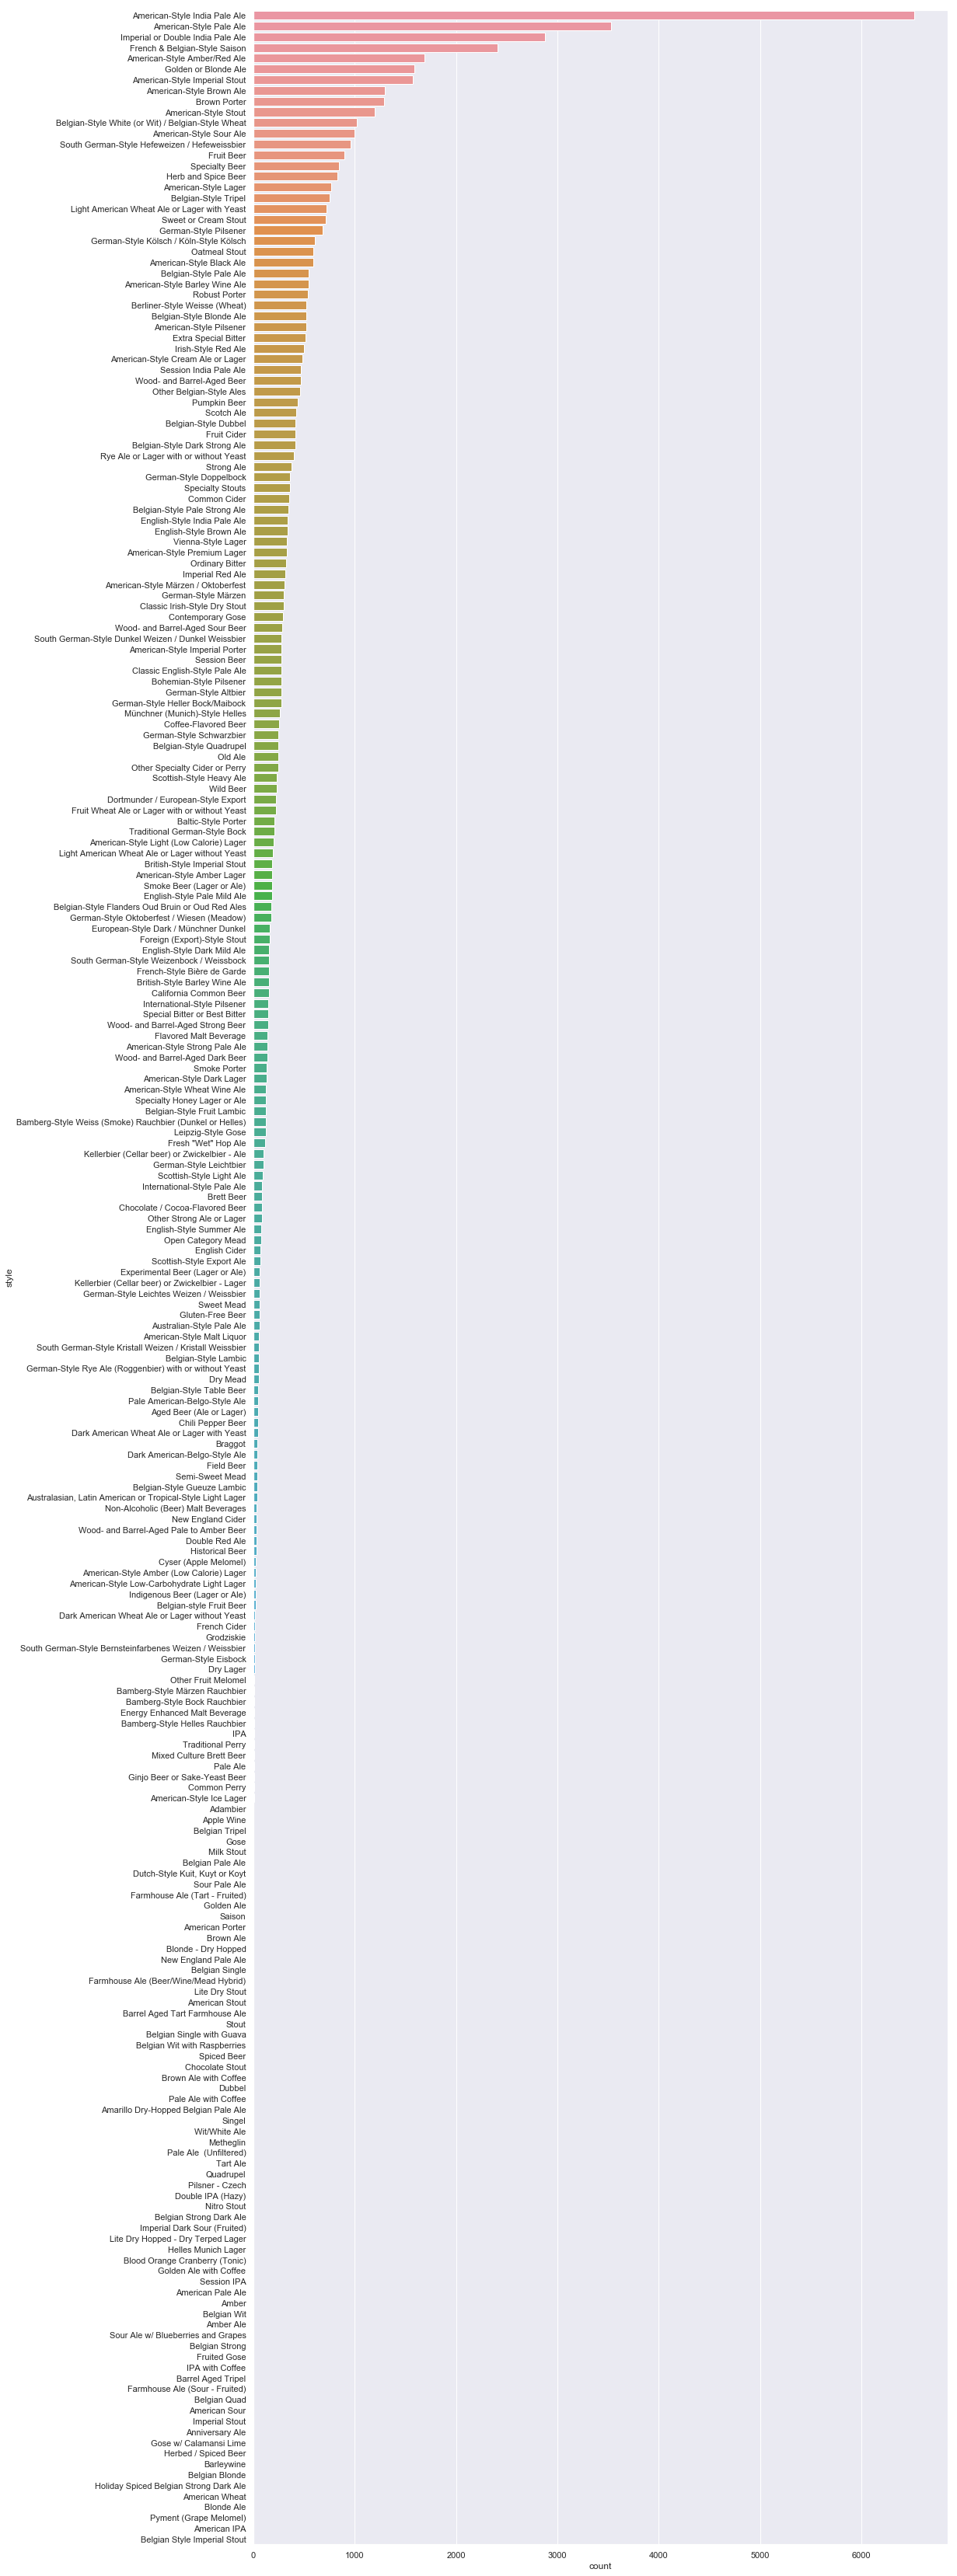

In [6]:
sns.set(rc={'figure.figsize':(16,60)})
# sns.countplot(y=df['style']) 
sns.countplot(
    y='style',
    data=df,
    order=df['style'].value_counts().index
)

In [7]:
print(f"Style: {df['style'].nunique()} - Total {df['style'].count()}")
print(f"Name: {df['name'].nunique()} Total {df['name'].count()}")
print(f"Description: {df['description'].nunique()} Total {df['description'].count()}")
print(f"IBU: {df['ibu'].nunique()} Total {df['ibu'].count()}")
print(f"ABV: {df['abv'].nunique()} Total {df['abv'].count()}")
print(f"Brewer Name: {df['brewer.name'].nunique()} Total {df['brewer.name'].count()}")

Style: 236 - Total 60417
Name: 51472 Total 60417
Description: 102 Total 102
IBU: 169 Total 26956
ABV: 199 Total 60417
Brewer Name: 5665 Total 60417


In [8]:
df[df['style'] == 'American-Style Imperial Stout'][['style', 'name', 'ibu', 'abv', 'brewer.name']]

,style,name,ibu,abv,brewer.name
0,American-Style Imperial Stout,"""18"" Imperial IPA 2",NaN,11.1,Ship Bottom Brewery
102,American-Style Imperial Stout,(512) FIVE,45.0,10.1,(512) Brewing Company
180,American-Style Imperial Stout,100 Barrel Series #12 Imperial Stout,50.0,7.7,Harpoon Brewery
231,American-Style Imperial Stout,10th Mountain Imperial Stout,87.0,9.3,Aspen Brewing Company
235,American-Style Imperial Stout,10W-40,NaN,8.0,Hi-Wire Brewing
244,American-Style Imperial Stout,110K+OT Batch #2,NaN,11.4,Cigar City Brewing
264,American-Style Imperial Stout,1221 Stout,NaN,12.0,Fountain Square Brewing Company
316,American-Style Imperial Stout,15th Anniversary Ale,70.0,9.8,Real Ale Brewing Company
339,American-Style Imperial Stout,17,NaN,10.0,Perennial Artisan Ales
349,American-Style Imperial Stout,1762 Russian Imperial Stout,90.0,9.0,Pigeon Hill Brewing Company


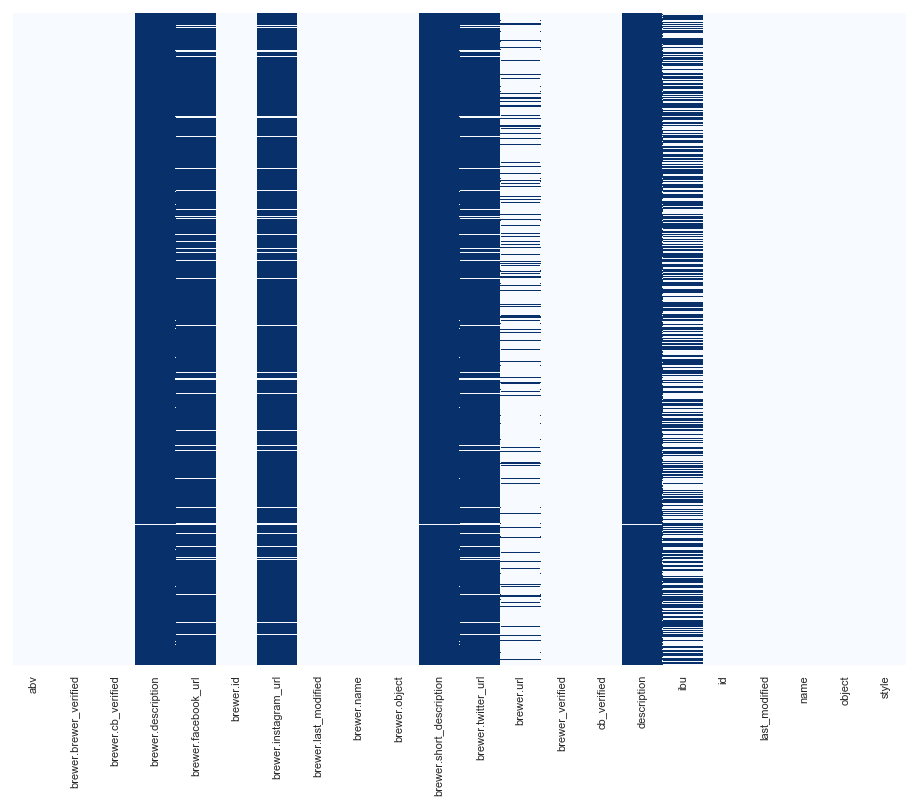

In [40]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [4]:
df = df.drop_duplicates(subset=['name', 'brewer.name'], keep='first')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57632 entries, 0 to 60416
Data columns (total 22 columns):
abv                         57632 non-null float64
brewer.brewer_verified      57632 non-null bool
brewer.cb_verified          57632 non-null bool
brewer.description          101 non-null object
brewer.facebook_url         3659 non-null object
brewer.id                   57632 non-null object
brewer.instagram_url        3270 non-null object
brewer.last_modified        57632 non-null int64
brewer.name                 57632 non-null object
brewer.object               57632 non-null object
brewer.short_description    101 non-null object
brewer.twitter_url          3321 non-null object
brewer.url                  48892 non-null object
brewer_verified             57632 non-null bool
cb_verified                 57632 non-null bool
description                 100 non-null object
ibu                         25644 non-null float64
id                          57632 non-null object
last_mo

In [7]:
df['style'] = pd.Categorical(df['style'])
df['style_code'] = df['style'].cat.codes
df.reset_index(drop=True, inplace=True)
df.head()

,abv,brewer.brewer_verified,brewer.cb_verified,brewer.description,brewer.facebook_url,brewer.id,brewer.instagram_url,brewer.last_modified,brewer.name,brewer.object,...,brewer_verified,cb_verified,description,ibu,id,last_modified,name,object,style,style_code
0,11.1,False,False,None,None,ecbd38d5-957b-4239-ab90-e6509b84ffd9,None,1588448205,Ship Bottom Brewery,brewer,...,False,False,None,NaN,3c4df9d1-84cb-485d-b510-a4a599d294a3,1588448205,"""18"" Imperial IPA 2",beer,American-Style Imperial Stout,21
1,6.3,False,False,None,None,48fe65c5-e1a6-4e40-a606-e5aa48678a01,None,1588448205,"Boothbay Craft Brewery, Inc",brewer,...,False,False,None,25.0,e5e04b79-143a-4c56-bc4e-7dbf87faa623,1588448205,"""633"" American Pale Ale",beer,American-Style Pale Ale,28
2,7.0,False,False,None,None,6f670bc0-a86b-44b3-8c5a-6a7eb4df4455,None,1588448205,Milwaukee Brewing Company,brewer,...,False,False,None,23.0,bf716596-4a14-4e44-9819-23da19a2de9f,1588448205,"""Admiral"" Stache",beer,Baltic-Style Porter,39
3,5.4,False,False,None,None,96f3809c-afa5-48de-a44a-4d899f19a791,None,1588448205,GAEL Brewing Company,brewer,...,False,False,None,51.0,33f9c3f7-0363-4402-96d7-f7cf7156aada,1588448205,"""Ah Me Joy"" Porter",beer,Robust Porter,193
4,4.8,False,False,None,None,2330d703-dfd4-4cca-ad92-06fa2e13f299,None,1588448205,Little Machine Beer,brewer,...,False,False,None,12.0,4c0155b1-a4aa-4b19-9a25-99ccba869036,1588448205,"""Alternating Currant"" Sour",beer,American-Style Sour Ale,31


In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import HashingVectorizer


features = ['style_code', 'ibu', 'abv']

def combine_features(row):
    cb = ""
    if len(features) == 1:
        return str(row[features[0]])
    
    for f in features:
        cb = cb + " " + str(row[f])
    cb = cb.replace('"', '')
    cb = cb.replace('  ', ' ')
    cb = cb.rstrip().lstrip()
    cb = cb.lower()
    return str(cb)

for feature in features:
    df[feature] = df[feature].fillna('')
    
df["combined_features"] = df.apply(combine_features,axis=1)

cv = HashingVectorizer()

df.head()

,abv,brewer.brewer_verified,brewer.cb_verified,brewer.description,brewer.facebook_url,brewer.id,brewer.instagram_url,brewer.last_modified,brewer.name,brewer.object,...,cb_verified,description,ibu,id,last_modified,name,object,style,style_code,combined_features
0,11.1,False,False,None,None,ecbd38d5-957b-4239-ab90-e6509b84ffd9,None,1588448205,Ship Bottom Brewery,brewer,...,False,None,,3c4df9d1-84cb-485d-b510-a4a599d294a3,1588448205,"""18"" Imperial IPA 2",beer,American-Style Imperial Stout,21,21 11.1
1,6.3,False,False,None,None,48fe65c5-e1a6-4e40-a606-e5aa48678a01,None,1588448205,"Boothbay Craft Brewery, Inc",brewer,...,False,None,25,e5e04b79-143a-4c56-bc4e-7dbf87faa623,1588448205,"""633"" American Pale Ale",beer,American-Style Pale Ale,28,28 25.0 6.3
2,7.0,False,False,None,None,6f670bc0-a86b-44b3-8c5a-6a7eb4df4455,None,1588448205,Milwaukee Brewing Company,brewer,...,False,None,23,bf716596-4a14-4e44-9819-23da19a2de9f,1588448205,"""Admiral"" Stache",beer,Baltic-Style Porter,39,39 23.0 7.0
3,5.4,False,False,None,None,96f3809c-afa5-48de-a44a-4d899f19a791,None,1588448205,GAEL Brewing Company,brewer,...,False,None,51,33f9c3f7-0363-4402-96d7-f7cf7156aada,1588448205,"""Ah Me Joy"" Porter",beer,Robust Porter,193,193 51.0 5.4
4,4.8,False,False,None,None,2330d703-dfd4-4cca-ad92-06fa2e13f299,None,1588448205,Little Machine Beer,brewer,...,False,None,12,4c0155b1-a4aa-4b19-9a25-99ccba869036,1588448205,"""Alternating Currant"" Sour",beer,American-Style Sour Ale,31,31 12.0 4.8


In [13]:
for i in df.columns.values:
    print(i)

abv
brewer.brewer_verified
brewer.cb_verified
brewer.description
brewer.facebook_url
brewer.id
brewer.instagram_url
brewer.last_modified
brewer.name
brewer.object
brewer.short_description
brewer.twitter_url
brewer.url
brewer_verified
cb_verified
description
ibu
id
last_modified
name
object
style
style_code
combined_features


In [9]:
count_matrix = cv.fit_transform(df["combined_features"])

cosine_sim = cosine_similarity(count_matrix, dense_output=False)


cosine_sim = cosine_sim.transpose()

In [10]:
sparse.save_npz('beer_similarity_matrix.npz', cosine_sim)

In [11]:
cosine_sim = sparse.load_npz('beer_similarity_matrix.npz')

In [12]:
# df['name'] = df['name'].replace(['Brandlöscher'],'Brandloscher')
# df.iloc[8870]['combined_features']
# df[(df['style_code'] == 1) & (df['abv'] == 4.8)]
df[df['combined_features'] == '1 4.8']

,abv,brewer.brewer_verified,brewer.cb_verified,brewer.description,brewer.facebook_url,brewer.id,brewer.instagram_url,brewer.last_modified,brewer.name,brewer.object,...,cb_verified,description,ibu,id,last_modified,name,object,style,style_code,combined_features
7008,4.8,False,False,None,None,9c1e3e71-cb1c-49c9-98e9-57b9948c038e,None,1588448205,Köstritzer Schwarzbierbrauerei GmbH,brewer,...,False,None,,b67dba85-e03b-44af-bd31-72e4de79341e,1588448205,Black Lager,beer,Aged Beer (Ale or Lager),1,1 4.8
8870,4.8,False,False,None,None,212f2cad-8e8d-4e4f-992f-009e29d74ab8,None,1588448205,Appenzeller Bier,brewer,...,False,None,,32387fed-0505-4cc2-92cc-550319d34653,1588448205,Brandlöscher,beer,Aged Beer (Ale or Lager),1,1 4.8
41307,4.8,False,False,None,None,212f2cad-8e8d-4e4f-992f-009e29d74ab8,None,1588448205,Appenzeller Bier,brewer,...,False,None,,3b99a821-e3e9-4117-87de-dd383de5b326,1588448205,Quöllfrisch hell,beer,Aged Beer (Ale or Lager),1,1 4.8


In [17]:
def get_title_from_index(index):
    return df[df.index == index]["name"].values[0]

def get_index_from_title(beer_name):
    return df[df.name == beer_name].index.values[0]

beer_user_likes = "Quöllfrisch hell"
beer_index = get_index_from_title(beer_user_likes)
beer_index

41307

In [18]:
similar_beers =  cosine_sim[beer_index]
similar_beers = similar_beers.transpose()
i = similar_beers.tocoo()
sorted_similar_beers = []
for d, r in zip(i.data, i.row):
    sorted_similar_beers.append((float(d), r))
sorted_similar_beers.sort(key = lambda x: x[0], reverse=True)

In [19]:
cosine_sim[beer_index]

<1x57632 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Column format>

In [20]:
i=0
print("Top 5 similar beers to "+beer_user_likes+" are:\n")
for element in sorted_similar_beers:
    print(get_title_from_index(element[1]), element[1])
    i=i+1
    if i>=20:
        break

Top 5 similar beers to Quöllfrisch hell are:



In [21]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(analyzer='word', min_df=100, max_features=100)

#Replace NaN with an empty string
df['name'] = df['name'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['name'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(57632, 100)

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [30]:
import csv
with open('cosine_data_test.csv','a') as f:
    writer = csv.writer(f)
    chunk = 0
    for batch in range(0, 7):
        
        cosine_sim = linear_kernel(tfidf_matrix[chunk:chunk+10000], tfidf_matrix)
        print("{} completed".format(chunk+10000))
        chunk = chunk + 10000
        writer.writerows(cosine_sim)
    


10000 completed
20000 completed
30000 completed
40000 completed
50000 completed
60000 completed


ValueError: Found array with 0 sample(s) (shape=(0, 100)) while a minimum of 1 is required by check_pairwise_arrays.

In [18]:
cosine_sim

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.03970495, 0.        , ..., 1.        , 0.07058947,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.07058947, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [19]:
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

In [32]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[13]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['name'].iloc[movie_indices]

In [30]:
indices[60000:]

name
Yipes!                                      60000
Yippe Rye Aye!                              60001
Yippee Ki-yay                               60002
Yippie IPA MF!                              60003
Yippie Ki-Yay IPA                           60004
Yippy IPA                                   60005
YNot!                                       60006
Yo Bro! Midnight Porter                     60007
Yo La Mango IPA                             60008
Yo Mama Electrolyte Infused Ale             60009
Yo Momma's Strawberry Pizzazz               60010
Yo Soy Un Berliner                          60011
Yo! Blueberry                               60012
Yoda's Green Tea Gold                       60013
Yodo Con Leche                              60014
Yoga Pants                                  60015
Yoga Pants                                  60016
Yoga Pants                                  60017
Yoga Pants                                  60018
Yoga Pants                                  6

In [33]:
get_recommendations("Yoda's Green Tea Gold", cosine_sim)

60013                       Yoda's Green Tea Gold
23534                                   Green Tea
23535                               Green Tea IPA
23536                               Green Tea IPA
23537                               Green Tea IPA
23538                               Green Tea IPA
23496                                  Green Gold
23539                         Green Tea Lemon Ale
23540                      GREEN TEA LEMON KOLSCH
29272                      Japanese Green Tea IPA
23503                               Green is Gold
23454                                       Green
23546                              Green-To-Green
22425                                        Gold
22426                                        Gold
22427                                        Gold
22428                                        Gold
22429                                        Gold
22430                                        Gold
22431                                        Gold
